<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization 데이터 시각화 

## 시각화 기본 원리 
  - 비교, 대조,차이를 드러내라.
  2. 인과관계와 상관관계를 보여라.
  3. 한 도표에 여러 변수를 보여라. 
  4. 텍스트, 숫자, 이미지, 그래프 같은 데이터들을 한 곳에 통합하라. 
  5. 사용된 데이터의 출처를 그래프 안이나 각주로 밝혀라. 
  6. 의미 있는 내용을 담아라. 

## Seaborn 사용한 데이터 시각화

### 산점도와 countplot 그래프

#### (1) 산점도 그리기 
      - 수치형 vs 수치형 데이터일 때 산점도를 그린다.

In [1]:
# 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/countries.csv'
countries = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


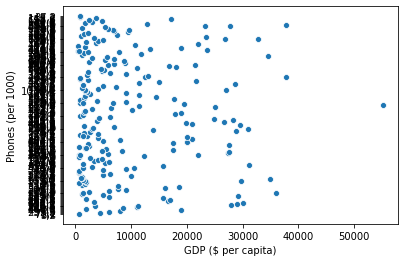

In [2]:
# 산점도 그리기 
sns.scatterplot(x='GDP ($ per capita)', y='Phones (per 1000)', data= countries)
plt.show()

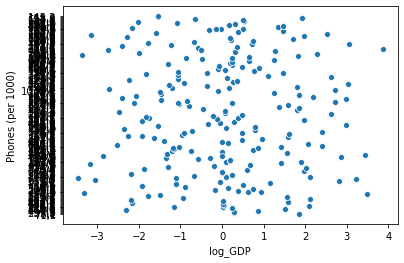

In [3]:
#log 붙여서 다시 산점도 그리기
countries['log_GDP']=np.log(countries['GDP ($ per capita)'].astype('float64')/countries['GDP ($ per capita)'].astype('float64').shift(1))
sns.scatterplot(x="log_GDP",  y='Phones (per 1000)', data= countries )

#### (2) countplot 그래프
      - 설문조사 진행 후, 각 응답에 따른 비율을 구할 수 있다. 
      - 거미를 싫어하는가에 대해 리커트 척도를 구한 것이다. 
        + 1은 매우 동의 & 5는 매우 비동의를 표한다. 
        + 그에 따른 빈도 그래프를 countplot으로 작성 할 수 있다. 
      - 기본적으로 막대 그래프 보여준다. 

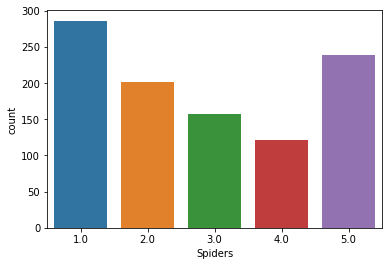

In [4]:
csv_filepath='https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/surveys.csv'

surveys = pd.read_csv(csv_filepath)
sns.countplot(x="Spiders", data= surveys)
plt.show()

#### (3) 제 3의 변수 추가 - 산점도
    - 시각화의 기본은 비교
    - 3의 변수 추가 필요
      + absences 는 결석수, G3는 최종성적 의미
      + location 변수를 추가해 비교를 쉽게 한다

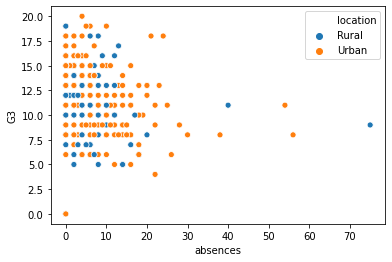

In [5]:
url = 'https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/students.csv'
students = pd.read_csv(url)

sns.scatterplot(x="absences", y="G3", data= students, hue='location', hue_order=['Rural','Urban'])
plt.show()

#### (4) 제2의 변수 추가 - countplot
      - countplot에 location 이라는 범주 추가
      - location에 범주별 색상 추가 (Adobe color wheel 사용)

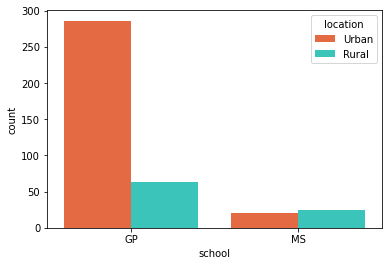

In [6]:
sns.countplot(x="school",
              data= students, 
              hue="location",
              palette={
                  "Rural": "#23DBCD",
                  "Urban": "#FF5C29"
              })
plt.show()

### 그래프 서브그룹 추가
- study_time의 범주는 4개, 이를 col 형태로 나타낼 수 있다. 
  + col 대신에 row 형태로도 작성 해본다

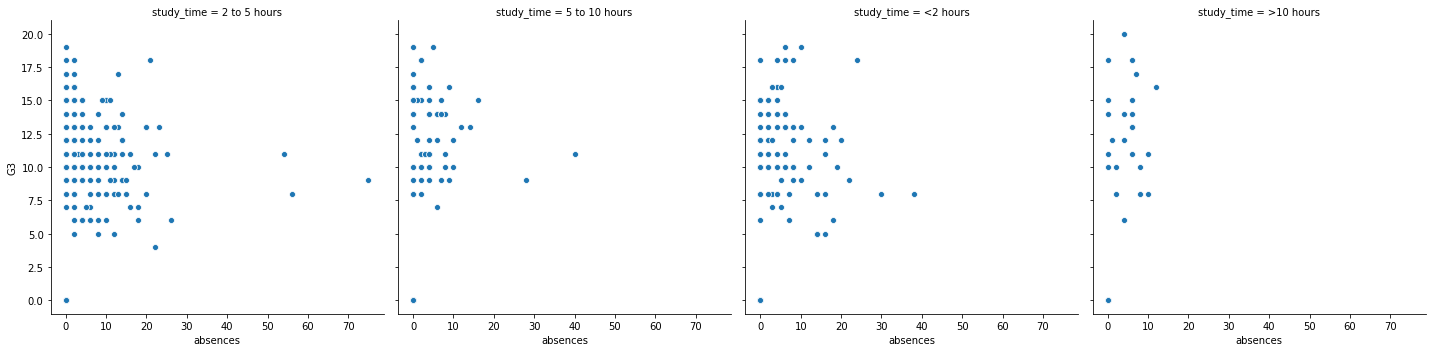

In [7]:
# col 형태
sns.relplot(x="absences", y="G3",
            data= students, 
            kind="scatter",
            col="study_time")

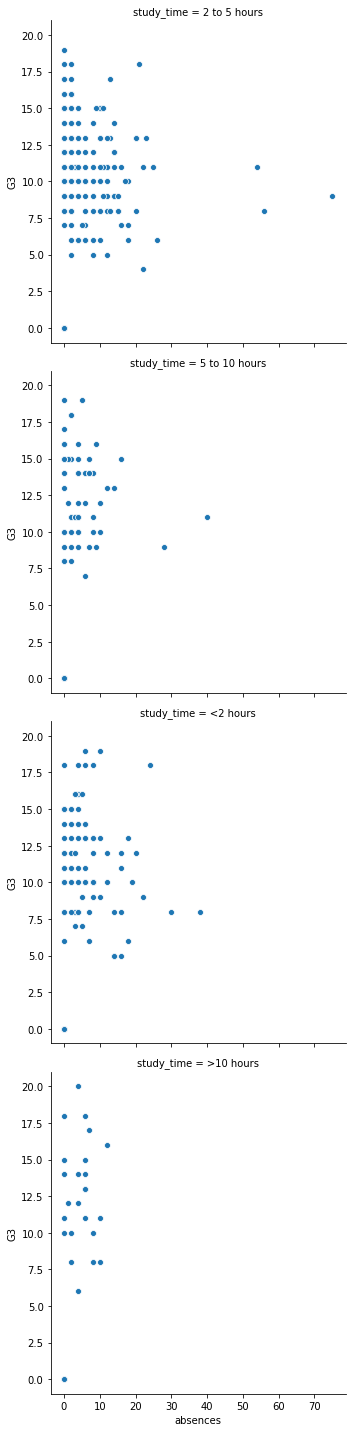

In [8]:
# row 형태 
sns.relplot(x="absences", y="G3",
            data= students, 
            kind="scatter",
            row="study_time")

- 하나의 변수를 추가해 본다.
  + 1학기 성적과 최종성적의 상관 관계를 표현
  + schoolsup은 학교에서 지원을 받은 사람, famsup은 가정에서 교육을 받은 사람

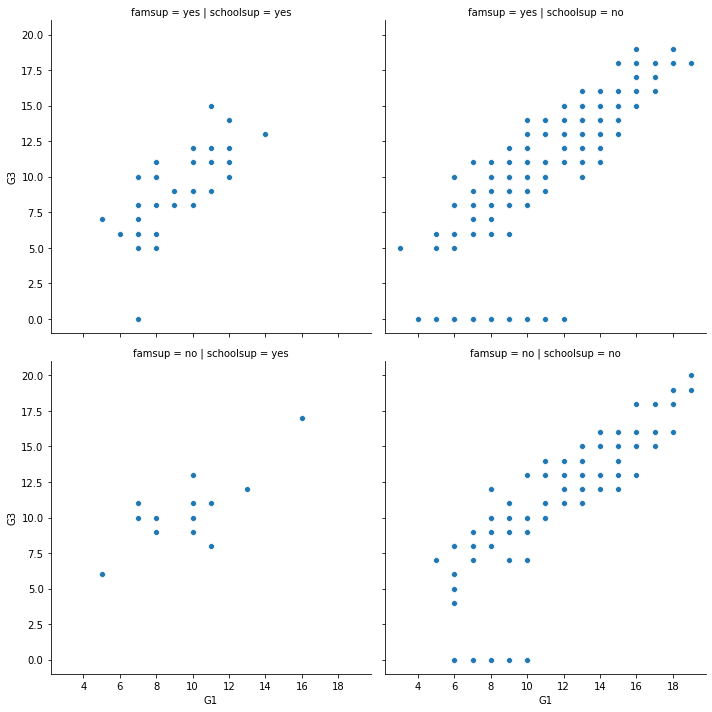

In [9]:
sns.relplot(x="G1", y="G3",
            data=students, 
            kind="scatter",
            col="schoolsup",
            col_order=["yes","no"],
            row="famsup",
            row_order=["yes","no"])
plt.show()

### 박스플롯
- 박스 플롯은 기본적으로 수치형- 범주형 데이터의 조합이다.
- 이 때, 두 가지 확인 필요
  + 수치형 데이터의 이상치는 없는가?
  +각 범주간의 평균의 차이는 없는가?
  

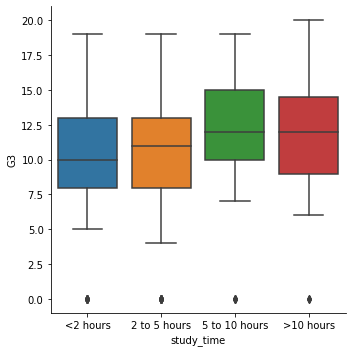

In [10]:
# 시간의 순서대로 리스트 재범주
study_time_order = ["<2 hours", "2 to 5 hours",
                    "5 to 10 hours", ">10 hours"]

sns.catplot(x="study_time",
            y="G3",
            data= students,
            kind= "box",
            order= study_time_order)

plt.show()

- 이상치 데이터 제거
- 변수(=location) 추가해서 나타내본다

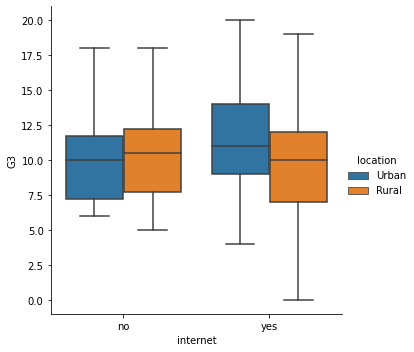

In [11]:
sns.catplot(x="internet", y="G3",
            data= students,
            kind="box",
            hue="location",
            sym="")          # Omitting the outliers using 'sym'

plt.show()

## Seaborn Tutorial


## Visualizing statistical relationships

### (1) Relating variables with scatter plots
- scatterplot() is the default kind in relplot()
  + if can also be forced by setting kind="scatter"

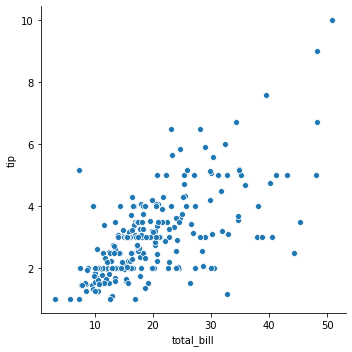

In [12]:
tips= sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

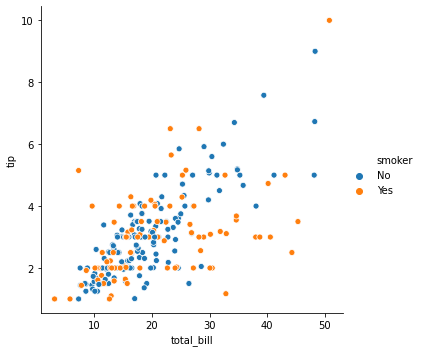

In [13]:
# add the third variable "smoker"
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

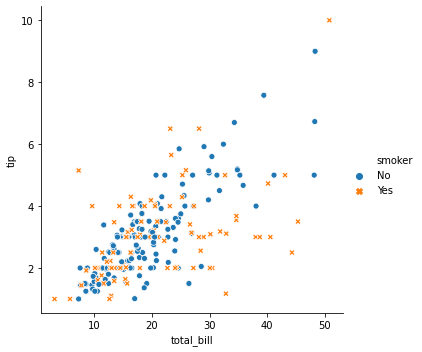

In [14]:
# differentiate the marker

sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

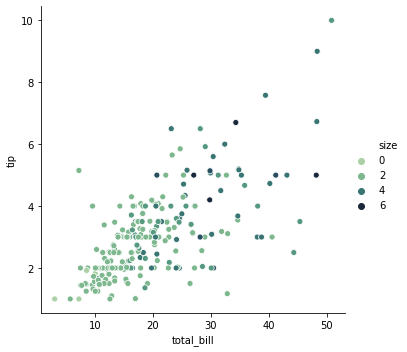

In [15]:
# changing the color with palette attribute
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

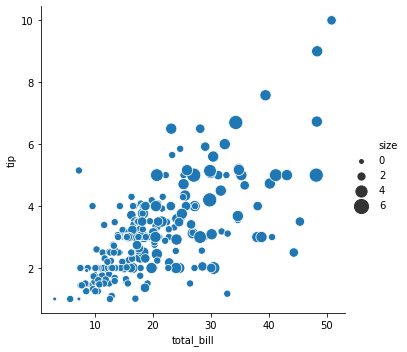

In [16]:
# visualizing the size 
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15,200), data=tips)

### (2) Emphasizing continuity with line plots
- using relplot() by setting kind="line"

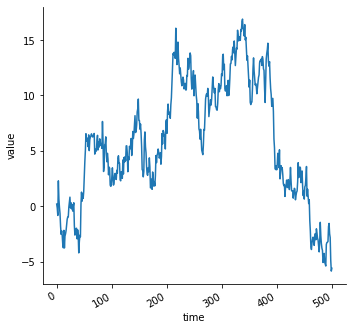

In [17]:
df= pd.DataFrame(dict(time=np.arange(500),
                     value=np.random.randn(500).cumsum()))
g= sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

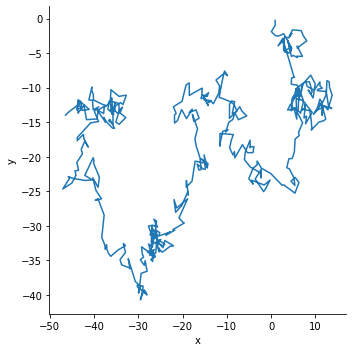

In [18]:
# can disable sorting by x value
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

### (3) Aggregation and representing uncertainty

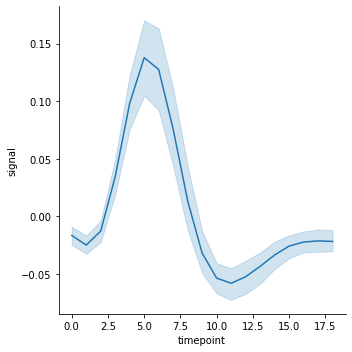

In [19]:
# aggregate multiple measurements by plotting the mean and the 95% confidence interval
fmri= sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data= fmri)

In [20]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


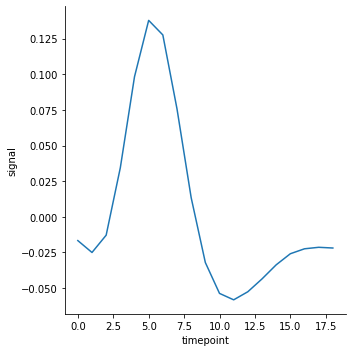

In [21]:
# Can disabel confidence interval
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

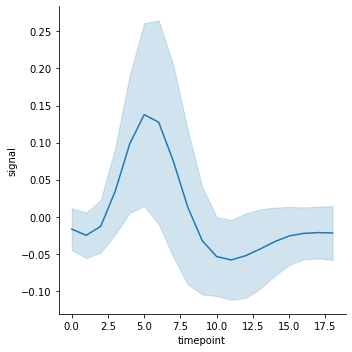

In [22]:
# can show standard deviation instead of confidence interval
# sd for standard deviation

sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

### (4) Plotting subsets of data with semantic mappings

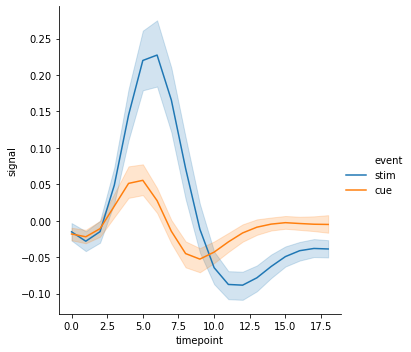

In [23]:
# can add one more parameter 
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

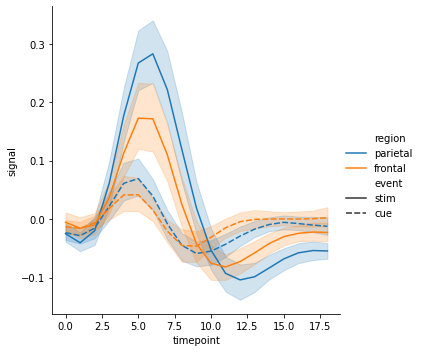

In [24]:
# add parameter by hue and add one more by style by differentiating the style
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

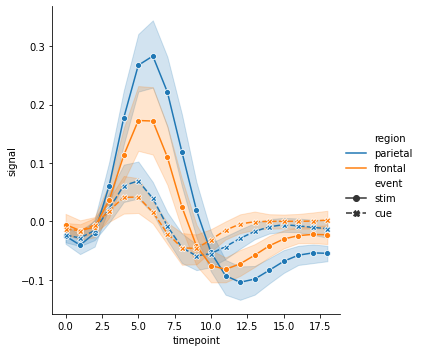

In [25]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=True, markers=True, kind="line", data=fmri)

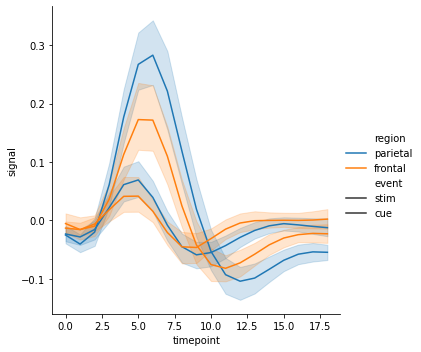

In [26]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=False, kind="line", data=fmri)

- Dots Dataset


In [27]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


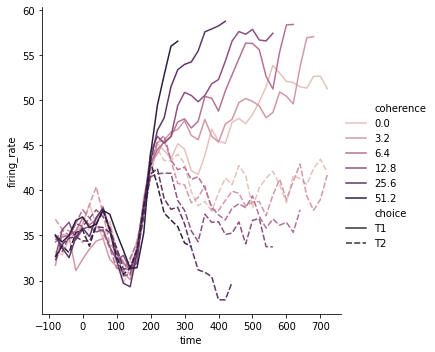

In [28]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots)

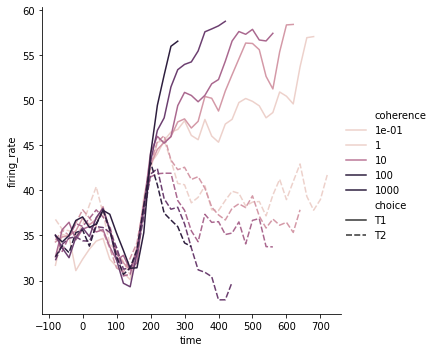

In [29]:
from matplotlib.colors import LogNorm

# how colormap is normalized 

palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots)

### (5) Plotting with date data

In [30]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,2017-01-01,0.962503
1,2017-01-02,1.700757
2,2017-01-03,0.739438
3,2017-01-04,0.694306
4,2017-01-05,0.859092


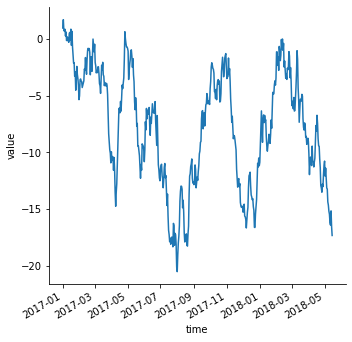

In [31]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### (6) Showing multiple relationships with facets

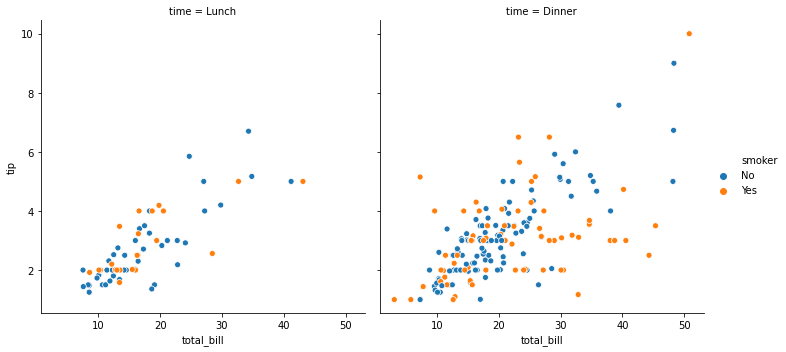

In [32]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips)

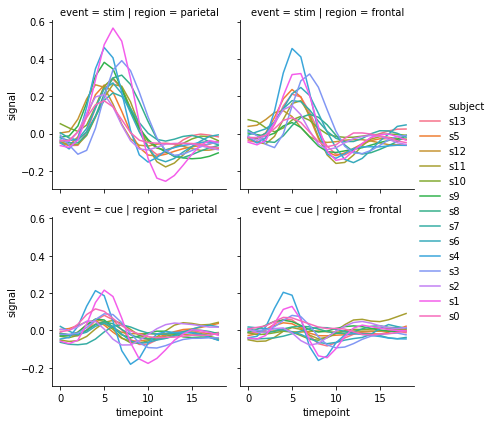

In [33]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

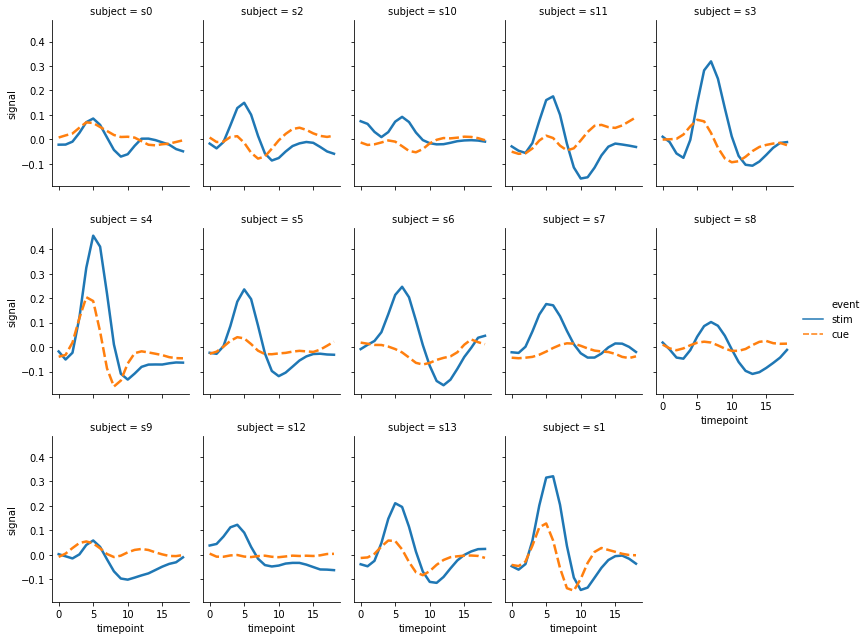

In [34]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

- sns.relplot() parameters


x=""  : variable of data that will go to x 


y=""  : variable of data that will go to x 


hue   : used to group the variable


size  : will produce elements with different sizes


style : Grouping variable that will produce elements with different styles

col,row :  Categorical variables that will determine the faceting of the grid   

col_wrap : column facets span multiple rows. Incompatible with a row facet

height :  Height (in inches) of each facet

aspect :  Aspect ratio of each facet

kind  :  Kind of plot to draw, corresponding to a seaborn relational plot. Options are {scatter and line}


data  :  which data you would like to visualize




## Plotting with categorical data

- Categorical scatterplots:

  + stripplot() (with kind="strip"; the default)

  + swarmplot() (with kind="swarm")


- Categorical distribution plots:

  + boxplot() (with kind="box")

  + violinplot() (with kind="violin")

  + boxenplot() (with kind="boxen")
  

- Categorical estimate plots:

  + pointplot() (with kind="point")

  + barplot() (with kind="bar")

  + countplot() (with kind="count")


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### (1) Categorical scatterplots

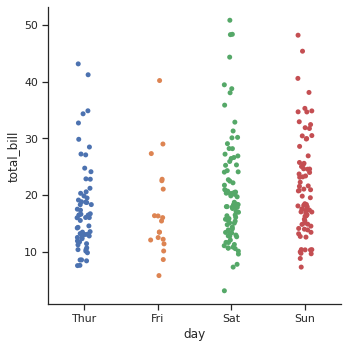

In [36]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


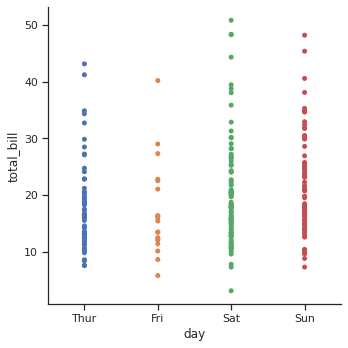

In [38]:
# jitter controls the magnitude 
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

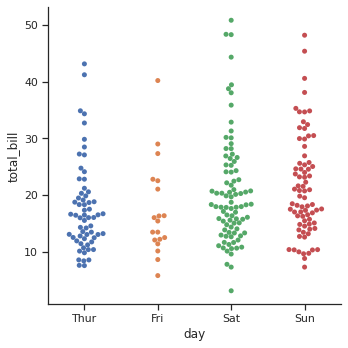

In [39]:
# swarmplot() shows the data well but it only works well when the data is small
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

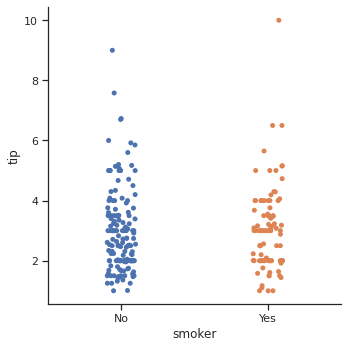

In [40]:
# can set order of the x 
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

### (2) Distributions of observations within categories

- Boxplots

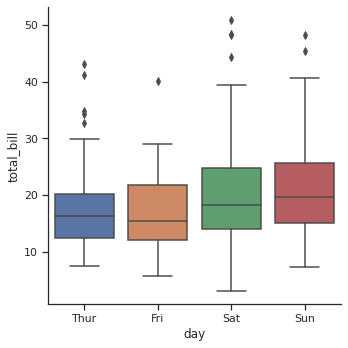

In [41]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

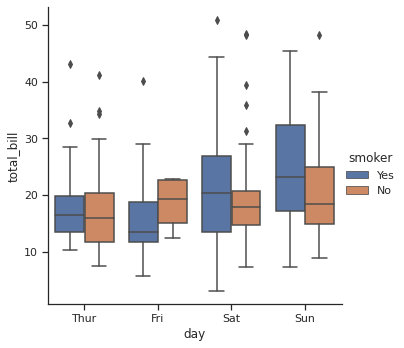

In [42]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

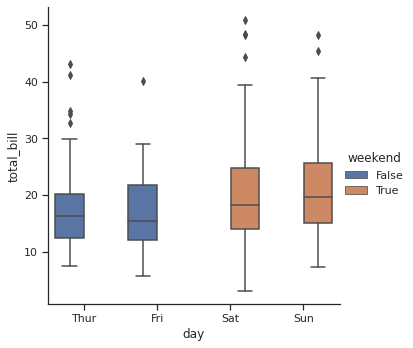

In [43]:
# if the semantic is not overlapping, put dodge into False
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=True, data=tips)

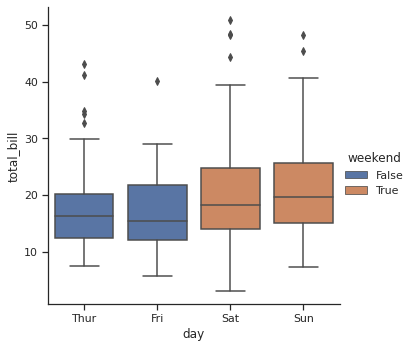

In [44]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

- boxenplot()

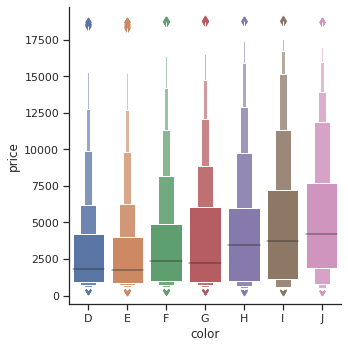

In [45]:
# shows the shape of the distribution 
# best for big data set
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

- Violinplots

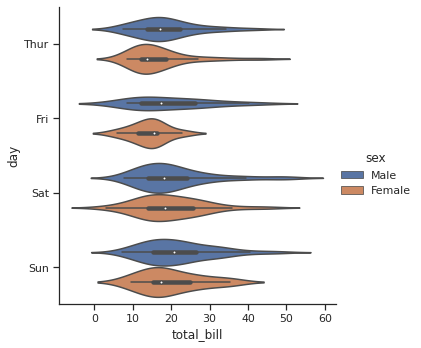

In [46]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

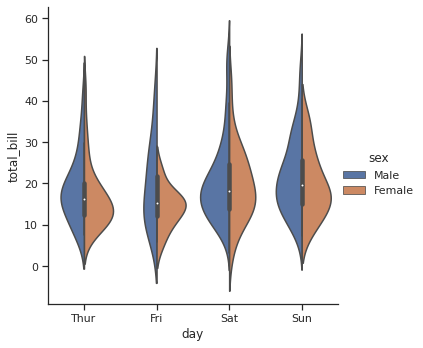

In [47]:
# split allows efficient use of space
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

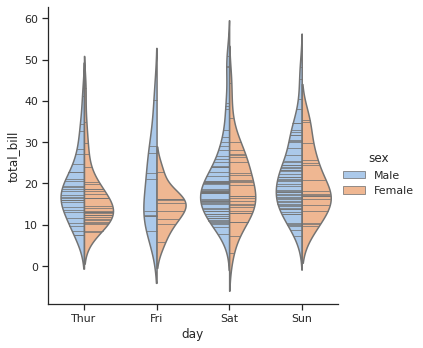

In [48]:
# inner=stick allows to show each individual observation instead of box plot summary
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips)

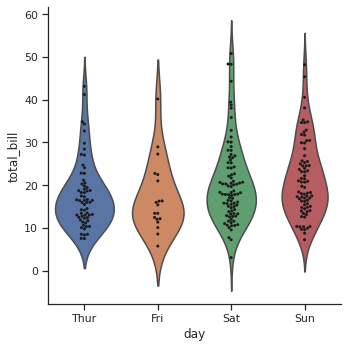

In [49]:
#  useful to combine swarmplot() or striplot() by ax

g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

### (3) Statistical estimation within categories

- Bar plots

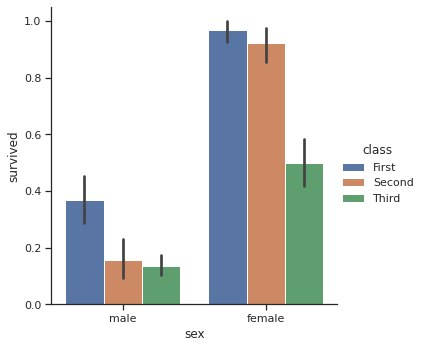

In [50]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

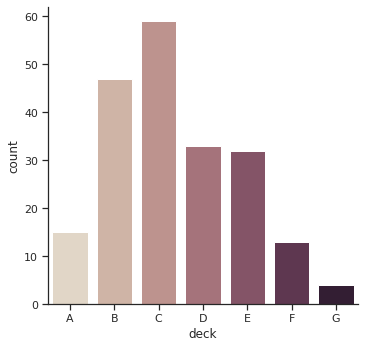

In [51]:
# show the number of observations in each category rather than computing a statistic for a second variable
# countplot()

sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)


- Point plots

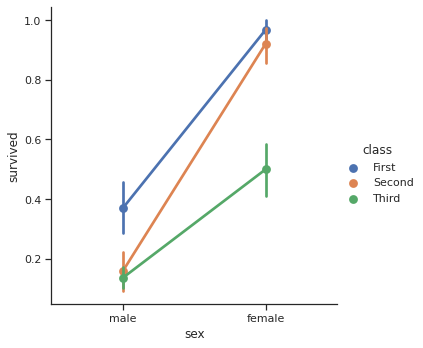

In [52]:
# plots the point estimate and confidence interval
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

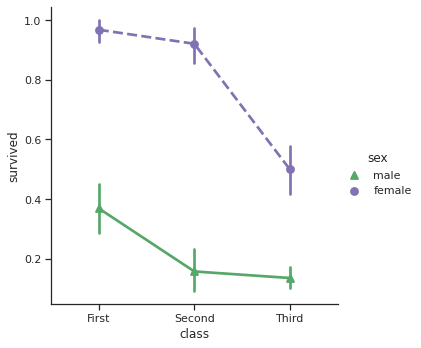

In [53]:
# can vary style
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male":"g", "female":"m"},
            markers=["^","o"], linestyles=["-","--"],
            kind="point", data=titanic)

## Visualizing the distribution of a dataset

In [54]:
import matplotlib.pyplot as plt
from scipy import stats

In [55]:
sns.set(color_codes=True)

### (1) Plotting univariate distributions

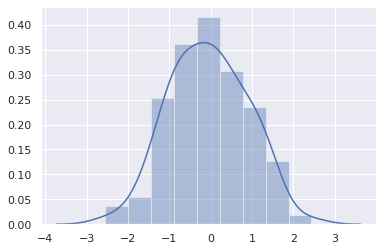

In [57]:
# distplot() will draw a histogram 
x= np.random.normal(size=100)
sns.distplot(x)

- histograms

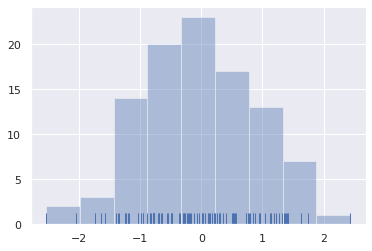

In [58]:
# matplotlib we can use hist funtion
# histogram without line
sns.distplot(x, kde=False, rug=True)

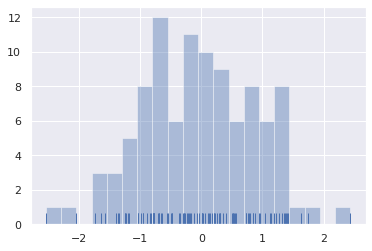

In [59]:
# more bins: divide the data into more small range
sns.distplot(x, bins=20, kde=False, rug=True)

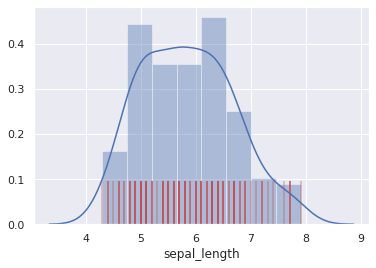

In [62]:
df=sns.load_dataset('iris')

# changing the rug parameter

sns.distplot(a=df["sepal_length"], rug=True,
             rug_kws={"color":"r","alpha":0.3, "linewidth":2, "height":0.2})

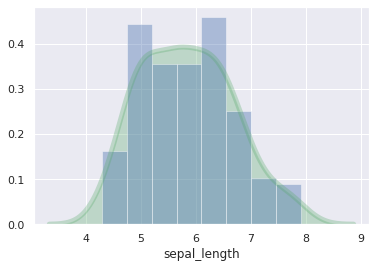

In [63]:
sns.distplot(a=df["sepal_length"], kde=True,
             kde_kws={"color":"g","alpha":0.3,"linewidth":5,"shade":True})

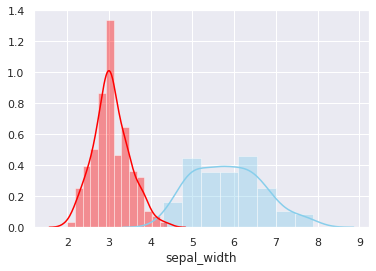

In [65]:
# drawing two diagrams in one graph

sns.distplot(df["sepal_length"], color="skyblue",label="Sepal Length")
sns.distplot(df["sepal_width"], color="red", label="Sepal Width")

### (2) Plotting bivariate distributions

In [66]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

- Scatterplots

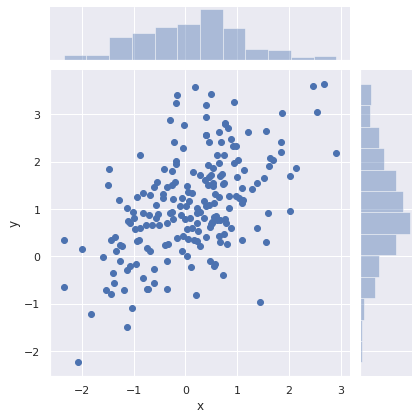

In [68]:
sns.jointplot(x="x",y="y", data=df)

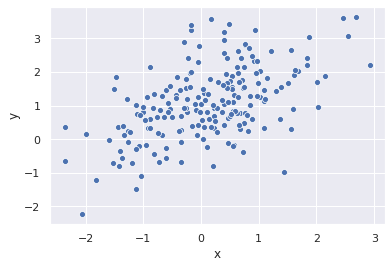

In [69]:
# Can also use scatterplot function
sns.scatterplot(x="x",y="y", data=df)

- Hexbin plots

In [ ]:
#  plot works best with relatively large datasets

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

### (3) Visualizing pairwise relationship in a dataset

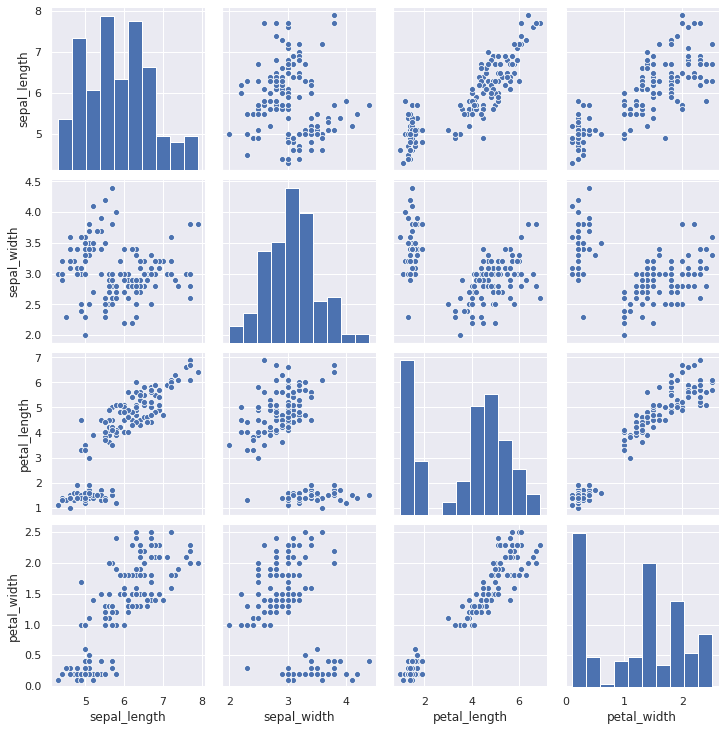

In [70]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

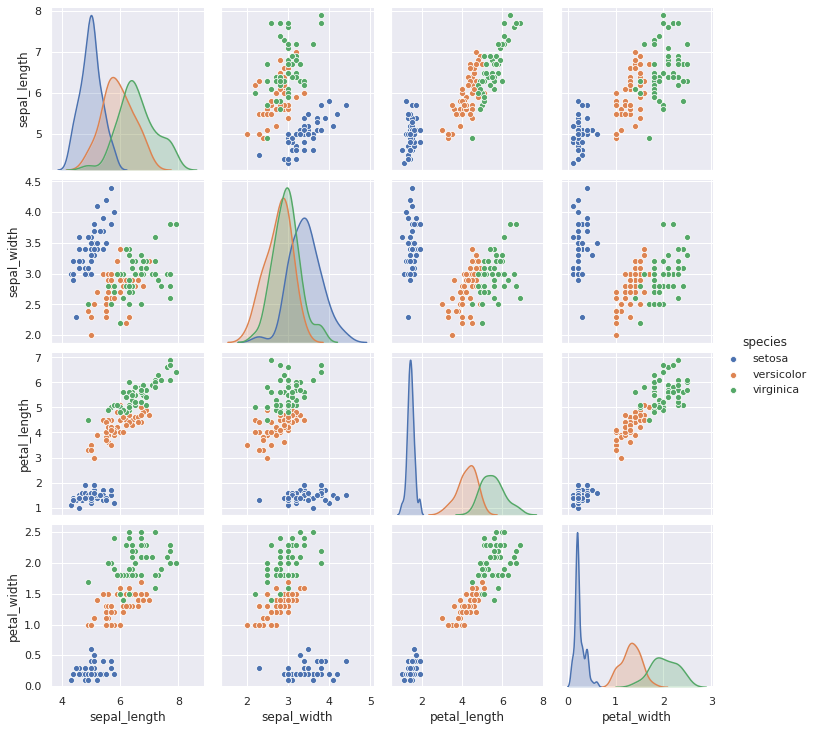

In [71]:
sns.pairplot(iris, hue="species")